# Assignment: Linear Models
## Do three questions.
### `! git clone https://github.com/ds4e/linearModels`

Q1, Q3, and Q5

In [29]:
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.float_format', lambda x: '%.5f' % x)  # to stop pandas from using scientific notation (issue for the car prices)

**Q1.** Please answer the following questions in your own words.

1. What makes a model "linear"? "Linear" in what?
    
    The model can be described as linear (y = mx + b) because it's like a weighted sum (mx) plus the intercept (b) — the weights/parameters (i.e. the coefficients) are multiplied by the explanatory variables (which can be non-linear transformations)

2. How do you interpret the coefficient for a dummy/one-hot-encoded variable? (This is a trick question, and the trick involves how you handle the intercept of the model.)
    
    The coefficient represents the average deviation/effect of the dummy variable coded as 1 vs. the category coded as 0 (the baseline), with all other variables held constant. The outcome for the baseline category is the same as the intercept because if you multiply anything by zero and add that to the intercept your result for y will be just the intercept. 

3. Can linear regression be used for classification? Explain why, or why not.
    
    Regression itself means predicting continuous values, while classification implies predicting discrete categories. There are ways to work around this and it can be applied to one-hot-encoded categorical variables where the values are 0/1, but a different method like logistic regression or a decision tree is probably going to be more appropriate for classification than linear regression. 

4. What are signs that your linear model is over-fitting?

    If you're using a lot of explanatory variables, especially ones where the training data has unique cases, your model is more likely to overfit. Adding too many extraneous variables overcomplicates the relationship between the outcome and the variables that are actually the best explanatory factors. For example if the R^2 is high on training data but much lower on test data, then it's likely that the model is responding more to noise in the training data because you've included too many variables rather than identifying true patterns.

5. Clearly explain multi-colinearity using the two-stage least squares technique.

    Multi-colinearity is a problem that can occur when two (or more) 'independent' variables included in your model are not in fact independent, because they are actually linearly related to each other. Specifically, the problem arises when they are highly correlated, meaning that your coefficient estimates will be inflated or unreliable. When using the least squares technique, this problem can affect both stages—in the first the regression will be unreliable if your instrumental variables are highly correlated, and in the second then the predicted variables will have inflated standard errors. 

6. How can you incorporate nonlinear relationships between your target/response/dependent/outcome variable $y$ and your features/control/response/independent variables $x$ into your analysis?

    The variables inside the weighted sum y = mx + b (linear) can be nonlinear transformations of a variable, like polynomials.

7. What is the interpretation of the intercept? A slope coefficient for a variable? The coefficient for a dummy/one-hot-encoded variable?

    The intercept is the baseline outcome if the effect of the independent variable(s) is zero. The slope coefficient is how that variable affects the dependent variable, with all other factors controlled/constant—it could be a positive or negative correlation, and the absolute value tells you the magnitude of the interaction/how much of an effect it has. For a one-hot-encoded variable, it's the average difference between the group coded as 1 and the group coded as 0 (baseline).

**Q2.** Load `./data/Q1_clean.csv`. The data include

- `Price` per night
- `Review Scores Rating`: The average rating for the property
- `Neighbourhood `: The bourough of NYC. Note the space, or rename the variable.
- `Property Type`: The kind of dwelling
- `Room Type`: The kind of space being rented

1. Compute the average prices and scores by `Neighbourhood `; which bourough is the most expensive on average? Create a kernel density plot of price and log price, grouping by `Neighbourhood `.
2. Regress price on `Neighbourhood ` by creating the appropriate dummy/one-hot-encoded variables, without an intercept in the linear model and using all the data. Compare the coefficients in the regression to the table from part 1. What pattern do you see? What are the coefficients in a regression of a continuous variable on one categorical variable?
3. Repeat part 2, but leave an intercept in the linear model. How do you have to handle the creation of the dummies differently? What is the intercept? Interpret the coefficients. How can I get the coefficients in part 2 from these new coefficients?
4. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood `. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
5. Split the sample 80/20 into a training and a test set. Run a regression of `Price` on `Review Scores Rating` and `Neighbourhood ` and `Property Type`. What is the $R^2$ and RMSE on the test set? What is the coefficient on `Review Scores Rating`? What is the most expensive kind of property you can rent?
6. What does the coefficient on `Review Scores Rating` mean if it changes from part 4 to 5? Hint: Think about how multilple linear regression works.
7. (Optional) We've included `Neighborhood ` and `Property Type` separately in the model. How do you interact them, so you can have "A bedroom in Queens" or "A townhouse in Manhattan". Split the sample 80/20 into a training and a test set and run a regression including that kind of "property type X neighborhood" dummy, plus `Review Scores Rating`. How does the slope coefficient for `Review Scores Rating`, the $R^2$, and the RMSE change? Do they increase significantly compares to part 5? Are the coefficients in this regression just the sum of the coefficients for `Neighbourhood ` and `Property Type` from 5? What is the most expensive kind of property you can rent?

**Q3.** This question is a case study for linear models. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.

In [44]:
cp = pd.read_csv('/Users/gracesaunders/Documents/GitHub/linearModels/data/cars_hw.csv')
cp.head()
# examined further in data wrangler

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


-0.3954242125495129


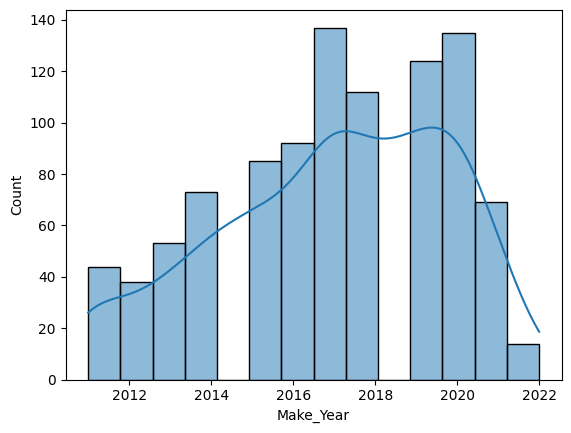

In [31]:
# first want to look at numeric variables that might have outliers or need to be transformed 
sns.histplot(cp['Make_Year'], kde=True)
print(cp['Make_Year'].skew())

0.5144961318046726


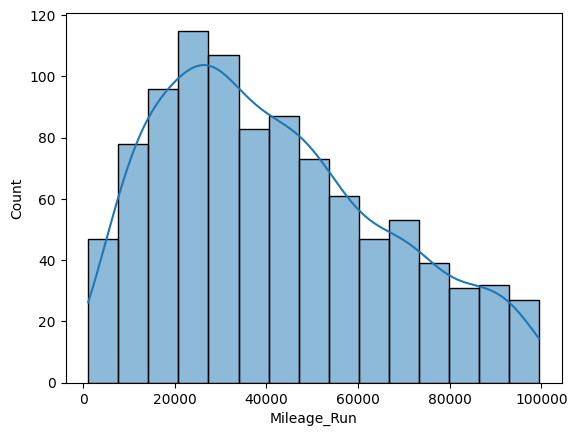

In [32]:
sns.histplot(cp['Mileage_Run'], kde=True)
print(cp['Mileage_Run'].skew())


1.611086705774724


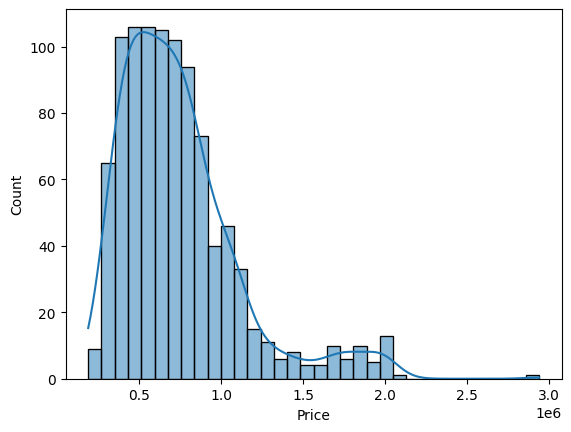

In [45]:
sns.histplot(cp['Price'], kde=True) 
print(cp['Price'].skew())

In [34]:
# Mileage_Run was ok, but Make_Year was somewhat left skewed and Price was right skewed, 
# so I will log transform them (not arcsinh because they do not have zero/negatives so log is fine)
cp["log_Price"] = np.log(cp["Price"])
cp["log_Year"] = np.log(cp["Make_Year"])

-0.3977714482661338


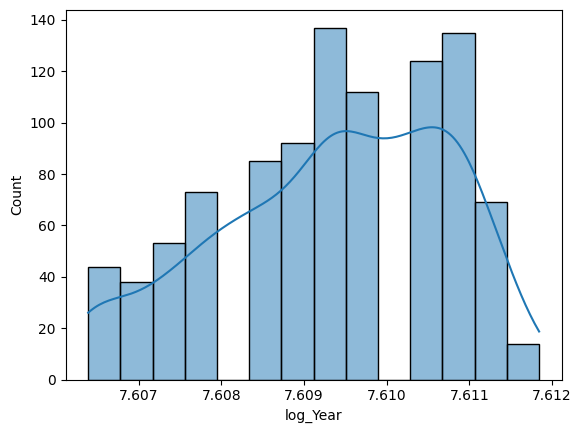

In [35]:
# replotting to see if the transformation helped
sns.histplot(cp['log_Year'], kde=True)
print(cp["log_Year"].skew())
# I tried log and arcsinh and got the same results; it wasn't that skewed anyways, so I will just use the original column for Make_Year

0.24827900085418783


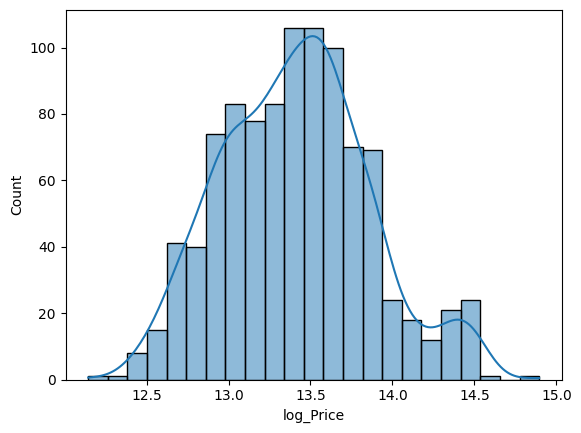

In [36]:
sns.histplot(cp['log_Price'], kde=True)
print(cp['log_Price'].skew())
# much better - Price was much more skewed than Make_Year, so I will keep this transformation for sure 

  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?


count       976.00000
mean     741019.46721
std      367323.37549
min      188000.00000
25%      475750.00000
50%      666500.00000
75%      883000.00000
max     2941000.00000
Name: Price, dtype: float64


<Axes: xlabel='Price', ylabel='Density'>

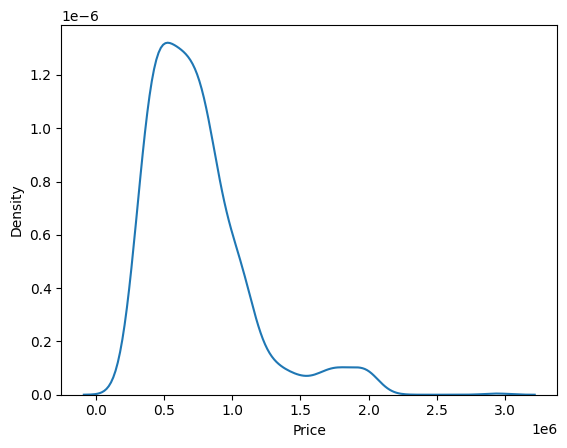

In [ ]:
price_summary = cp['Price'].describe()
print(price_summary)
# reprinting the kde plot 
sns.kdeplot(cp['Price'])
# looks like the vast majority of cars in the dataset are captured by the first bump
# but there is a small secondary bump of luxury cars, and even a tiny third bump
# I'm confused because the summary statistics show that the prices are very high - the minimum price is almost $200k
# I don't have a car, but I didn't think they were that expensive unless this dataset is only luxury cars, or maybe the unit isn't dollars? 

In [38]:
make_summary = cp.groupby('Make')['Price'].describe()
print(make_summary)

                  count          mean           std           min  \
Make                                                                
Chevrolet       6.00000  453500.00000  246606.36650  267000.00000   
Datsun          3.00000  289666.66667   10503.96750  279000.00000   
Ford           52.00000  721173.07692  140927.69960  290000.00000   
Honda          73.00000  798972.60274  266509.06659  316000.00000   
Hyundai       305.00000  691891.80328  279159.70852  248000.00000   
Jeep            4.00000 1499500.00000  152513.38739 1290000.00000   
Kia             8.00000 1614750.00000  119056.70918 1369000.00000   
MG Motors      35.00000 1869457.14286  121661.13567 1589000.00000   
Mahindra       18.00000 1100166.66667  175549.30596  796000.00000   
Maruti Suzuki 293.00000  588784.98294  216019.86094  237000.00000   
Nissan          4.00000  884250.00000  289559.86715  475000.00000   
Renault        68.00000  662573.52941  214827.33894  287000.00000   
Skoda           5.00000 1136000.00

<Axes: xlabel='Price', ylabel='Density'>

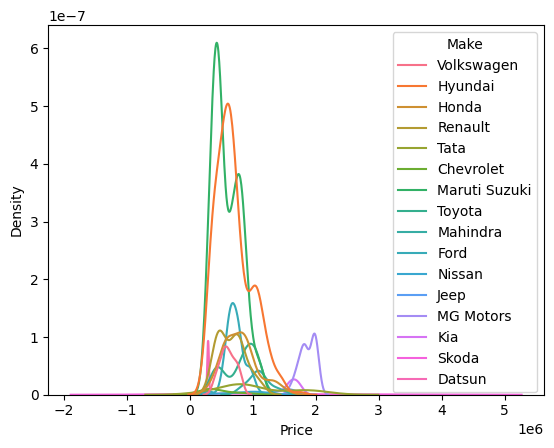

In [39]:
sns.kdeplot(data=cp, x='Price', hue='Make')

In [40]:
# the plot is a bit hard to read because of all the overlap
print(make_summary.sort_values(by='mean', ascending=False).head(5))


             count          mean           std           min           25%  \
Make                                                                         
MG Motors 35.00000 1869457.14286  121661.13567 1589000.00000 1786500.00000   
Kia        8.00000 1614750.00000  119056.70918 1369000.00000 1579000.00000   
Jeep       4.00000 1499500.00000  152513.38739 1290000.00000 1447500.00000   
Skoda      5.00000 1136000.00000 1070174.98569  436000.00000  466000.00000   
Mahindra  18.00000 1100166.66667  175549.30596  796000.00000 1037000.00000   

                    50%           75%           max  
Make                                                 
MG Motors 1848000.00000 1978000.00000 2019000.00000  
Kia       1628500.00000 1705750.00000 1741000.00000  
Jeep      1529500.00000 1581500.00000 1649000.00000  
Skoda      538000.00000 1299000.00000 2941000.00000  
Mahindra  1094500.00000 1157000.00000 1465000.00000  


In [41]:
print(make_summary.sort_values(by='max', ascending=False).head(5))

              count          mean           std           min           25%  \
Make                                                                          
Skoda       5.00000 1136000.00000 1070174.98569  436000.00000  466000.00000   
Tata       23.00000 1055217.39130  557830.53443  188000.00000  779500.00000   
MG Motors  35.00000 1869457.14286  121661.13567 1589000.00000 1786500.00000   
Hyundai   305.00000  691891.80328  279159.70852  248000.00000  485000.00000   
Kia         8.00000 1614750.00000  119056.70918 1369000.00000 1579000.00000   

                    50%           75%           max  
Make                                                 
Skoda      538000.00000 1299000.00000 2941000.00000  
Tata       869000.00000 1552000.00000 2100000.00000  
MG Motors 1848000.00000 1978000.00000 2019000.00000  
Hyundai    638000.00000  837000.00000 1742000.00000  
Kia       1628500.00000 1705750.00000 1741000.00000  


<Axes: xlabel='Price', ylabel='Density'>

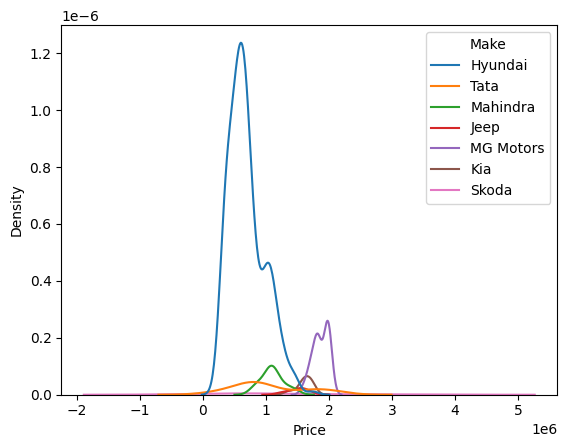

In [42]:
top_makes = ['MG Motors', 'Kia', 'Jeep', 'Skoda', 'Mahindra', 'Tata', 'Hyundai']
cp_top_makes = cp[cp['Make'].isin(top_makes)]
sns.kdeplot(data=cp_top_makes, x='Price', hue='Make')

In [ ]:
# I still don't know why the prices are so high, but I will keep the data as is and use the log_price transformed column to build the model
cp = cp[cp['Price']<1000000]
cp.describe()

,Unnamed: 0,Make_Year,Mileage_Run,Seating_Capacity,Price
count,805.00000,805.00000,805.00000,805.00000,805.00000
mean,487.90683,2016.55776,42196.99130,5.07950,608808.69565
std,284.25501,2.84302,24545.46469,0.41864,190765.56469
min,1.00000,2011.00000,1117.00000,4.00000,188000.00000
25%,246.00000,2014.00000,22801.00000,5.00000,449000.00000
50%,480.00000,2017.00000,38868.00000,5.00000,607000.00000
75%,741.00000,2019.00000,59680.00000,5.00000,764000.00000
max,976.00000,2022.00000,99495.00000,8.00000,999000.00000


<Axes: xlabel='Price', ylabel='Density'>

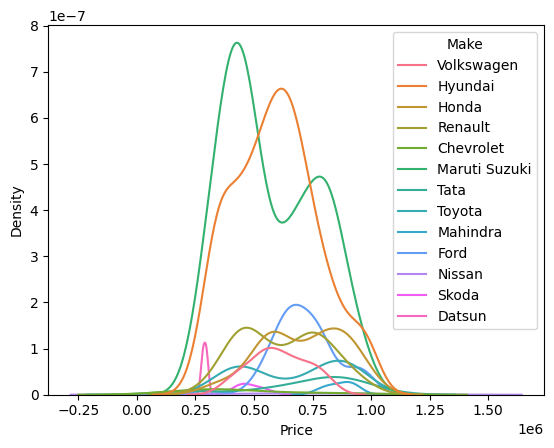

In [48]:
sns.kdeplot(cp, x='Price', hue='Make')
# this looks much better, and eliminated the third bump completely without losing too much data

In [24]:
def one_hot_encode(df, column):
    dummies = pd.get_dummies(df[column], prefix=column)
    df = pd.concat([df, dummies], axis=1)
    return df

  3. Split the data into an 80% training set and a 20% testing set.


  4. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the training set and test set? Make a second model where, for the categorical variables, you regress price on a model comprised of one-hot encoded regressors/features alone (you can use `pd.get_dummies()`; be careful of the dummy variable trap); what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?


  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using in the regression. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 4?


  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

**Q4.** This question refers to the `heart_hw.csv` data. It contains three variables:

  - `y`: Whether the individual survived for three years, coded 0 for death and 1 for survival
  - `age`: Patient's age
  - `transplant`: `control` for not receiving a transplant and `treatment` for receiving a transplant

Since a heart transplant is a dangerous operation and even people who successfully get heart transplants might suffer later complications, we want to look at whether a group of transplant recipients tends to survive longer than a comparison group who does not get the procedure.

1. Compute (a) the proportion of people who survive in the control group who do not receive a transplant, and (b) the difference between the proportion of people who survive in the treatment group and the proportion of people who survive in the control group. In a randomized controlled trial, this is called the **average treatment effect**.
2. Regress `y` on `transplant` using a linear model with a constant. How does the constant/intercept of the regression and the coefficient on transplant compare to your answers from part 1? Explain the relationship clearly.
3. We'd like to include `age` in the regression, since it's reasonable to expect that older patients are less likely to survive an extensive surgery like a heart transplant. Regress `y` on a constant, transplant, and age. How does the intercept change?
4. Build a more flexible model that allows for non-linear age effects and interactions between age and treatment. Use a train-test split to validate your model. Estimate your best model, predict the survival probability by age, and plot your results conditional on receiving a transplant and not. Describe what you see.
5. Imagine someone suggests using these kinds of models to select who receives organ transplants; perhaps the CDC or NIH starts using a scoring algorithm to decide who is contacted about a potential organ. What are your concerns about how it is built and how it is deployed?

**Q5.** This is a question about linear regression. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.

In [6]:
pt = pd.read_csv("/Users/gracesaunders/Documents/GitHub/linearModels/data/pretrial_data.csv")
pt0 = pt

In [7]:
pt.head()

,Unnamed: 0,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [8]:
pt = pt.drop(columns=['age','bond','bond_type','prior_M','released', 'sentence_type','sentence', 'bond_NA','sentence_NA'])

In [9]:
pt = pt.dropna()
pt.head()

,Unnamed: 0,case_type,sex,race,is_poor,prior_F,gini,held_wo_bail
3,3,M,M,B,0.0,0.0,0.44,False
4,4,F,F,W,0.0,0.0,0.44,False
5,5,M,M,B,0.0,1.0,0.44,False
6,6,F,F,B,1.0,0.0,0.44,False
7,7,M,M,B,0.0,0.0,0.44,False


2. Create a dummy variable indicating that the defendant is Black.

In [10]:
dummy_race = pd.get_dummies(pt, columns=['race'], drop_first=True)
print(dummy_race['race_B'])
pt['Black'] = dummy_race['race_B']

3         True
4        False
5         True
6         True
7         True
         ...  
22980    False
22981     True
22983     True
22984     True
22985     True
Name: race_B, Length: 21402, dtype: bool


3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?


In [11]:
from sklearn.linear_model import LinearRegression # Import linear regression model

y = pt['held_wo_bail'] # Target variable

X = pt[['Black']] # Independent variable

In [12]:
reg = LinearRegression().fit(X, y) # Fit the linear model
print("Intercept: ", reg.intercept_) 
print("The intercept indicates that non-black individuals have a baseline probability of being held without bail of 23%")
print("Regression coefficient: ", reg.coef_) 
print("The regression coefficient indicates that black individuals are about 7% more likely to be held without bail than non-black individuals")
print("R squared: ",reg.score(X, y))
print("The R squared value indicates that the model explains less than 1% of the variance in the data")

Intercept:  0.23910276805599712
The intercept indicates that non-black individuals have a baseline probability of being held without bail of 23%
Regression coefficient:  [0.06633325]
The regression coefficient indicates that black individuals are about 7% more likely to be held without bail than non-black individuals
R squared:  0.005455721700310279
The R squared value indicates that the model explains less than 1% of the variance in the data


4. Before doing this question, please think for a few minutes about how to make the process of running the following regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.


In [13]:
y = pt['held_wo_bail'] # Target variable
X = pt[['Black']]

def run_regression(var):

    global X # so that changes will apply to the global variable outside of the function call
    new_dummies = pd.get_dummies(pt[[var]], columns=[var], drop_first=True) # make dummies for the new variable

    X = pd.concat([X, new_dummies], axis=1) # add to existing independent variables
    reg = LinearRegression().fit(X, y) # Fit the linear model
    print(f"Added variable: {var}")
    print(f"Intercept: {reg.intercept_}") 
    print(f"Regression coefficient for Black: {reg.coef_[0]}") #first variable is always Black
    print(f"R squared: {reg.score(X, y)}\n")

In [14]:
run_regression('sex')
run_regression('is_poor')
run_regression('prior_F')
run_regression('case_type')
X

Added variable: sex
Intercept: 0.1675352254392155
Regression coefficient for Black: 0.060927359846529534
R squared: 0.016023874109976854

Added variable: is_poor
Intercept: 0.07882486737834063
Regression coefficient for Black: 0.03441190852602475
R squared: 0.05895681054988522

Added variable: prior_F
Intercept: 0.05273342280467408
Regression coefficient for Black: 0.01325193355096316
R squared: 0.13598400872971905

Added variable: case_type
Intercept: 0.3740753762995344
Regression coefficient for Black: 0.011107651564860122
R squared: 0.2922065623889376



,Black,sex_M,is_poor_1.0,prior_F_1.0,prior_F_2.0,prior_F_3.0,prior_F_4.0,prior_F_5.0,prior_F_6.0,prior_F_7.0,...,prior_F_50.0,prior_F_52.0,prior_F_54.0,prior_F_55.0,prior_F_64.0,prior_F_78.0,prior_F_119.0,case_type_I,case_type_M,case_type_S
3,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,True,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
6,True,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
7,True,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22980,False,True,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
22981,True,True,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
22983,True,True,True,False,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,True,False
22984,True,False,False,True,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False


These findings show that as we add more variables, the explanatory power increases (because R squared increases), most significantly with the addition of case_type. Still in general the linear model does not seem to be very appropriate here, because the highest R squared is still not very close to 1. The coefficient for Black decreased with each added variable, meaning that these other variables explain most of the variance in held_wo_bail, but the final output does indicate that 1.1% of the variance is still correlated with race after controlling for other factors. 

5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.


In [15]:
from sklearn.preprocessing import PolynomialFeatures
import pandas as pd

In [21]:
pt['sex_male'] = pd.get_dummies(pt['sex'], drop_first=True) # Create dummies

expander = PolynomialFeatures(degree=2,include_bias=False, interaction_only=True) # Create the expander
Z = expander.fit_transform(pt[['Black', 'sex_male']]) # Pass the df into the expander to get powers/interactions of x and y

names = expander.get_feature_names_out(['Black', 'sex_male']) # Get the names of these variables
X = pd.DataFrame(data=Z, columns = names) # Create a new, expanded dataframe

X.head()

,Black,sex_male,Black sex_male
0,1.0,1.0,1.0
1,0.0,0.0,0.0
2,1.0,1.0,1.0
3,1.0,0.0,0.0
4,1.0,1.0,1.0


In [22]:
reg = LinearRegression(fit_intercept=True).fit(X, y) # Fit the linear model
results = pd.DataFrame({'variable':reg.feature_names_in_, 'coefficient': reg.coef_}) # Regression coefficients
print('R-squared: ', reg.score(X, y))
print("Intercept: ", reg.intercept_)
results

R-squared:  0.019233785893430166
Intercept:  0.19860999732692036


,variable,coefficient
0,Black,-0.023992
1,sex_male,0.057646
2,Black sex_male,0.115510


These results seem to suggest that actually the defendant being Black decreases the likelihood of being held without bail by about 2%, while being male increases the probability by about 6% and being a Black male increases the probability by about 11%. However, once again, the model is not a very good explanation for bail outcomes because of the low R squared. 

6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

I think tools like this are useful for exposing systematic bias so that we can discuss issues and work to make systems more equitable. I find it difficult to picture an ethical application of that kind of automated bail processing. By basing future decisions off of prior judgements on protected characteristics like sex or race I actually think you'd be quite likely to run into discrimination lawsuits if anything. Obviously our current criminal justice system is extremely far from perfect, but in theory decisions are meant to be made based on specific cases with knowledge of legal precedent. Maybe you could develop a program to make a more "logical" recommendation based on case law using a sophisticated neural network assessing the details of the crime, but basing important decisions with dramatic outcomes for people's lives on their demographic characteristics seems highly unethical and much more likely to perpetuate existing biases than to correct them. I've read plenty about how judges are as human as the rest of us and their decisions are not always based solely on rationality. For instance, studies have found that their decisions can even be impacted by things like the "hungry judge effect" or recent losses by their favorite sports team (https://www.vera.org/news/game-day-injustice-judges-dole-out-harsher-sentences-after-home-team-upset), factors which disproportionately affect certain groups. So we definitely do need to find ways to make the justice system more fair for people going through it, but I do not think this would be a good method. 

**Q6.** Let's explore multiple linear regression in a two-variable case, to build more intuition about what is happening.

Suppose the model is 
$$
\hat{y}_i = b_0 + b_1 z_{i1} + b_2 z_{i2}
$$
Assume that $z_{ij}$ is centered or de-meaned, so that $z_{ij} = x_{ij} - m_j$ where $m_j$ is the mean of variable $j$ and $x_{ij}$ is the original value of variable $j$ for observation $i$. Notice that this implies
$$
\dfrac{1}{N} \sum_{i=1}^N z_{ij} = 0
$$
which will simplify your calculations below substantially!

1. Write down the SSE for this model.
2. Take partial derivatives with respect to $b_0$, $b_1$, and $b_2$.
3. Verify that the average error is zero and $e \cdot z =0$ at the optimum, just as in the single linear regression case.
4. Show that the optimal intercept is $b_0^* = \bar{y}$. Eliminate $b_0^*$ from the remaining equations, and focus on $b_1$ and $b_2$.
5. Write your results as a matrix equation in the form "$Ab=C$". These are called the **normal equations**.
6. Divide both sides by $N$ and substitute $z_{ij} = x_{ij} - m_j$ back into your normal equations for $x_{ij}$. What is the matrix $A$? What is the vector $C$? Explain the intuition of your discovery.

**Q7.** In class, we showed that for the single linear regression model,
\begin{alignat*}{3}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{alignat*}

1. When will $b^*$ be large or small, depending on the relationship between $X$ and $Y$ and the variance of $X$?
2. Suppose you have measurement error in $X$ which artificially inflates its variance (e.g. bad data cleaning). We'll model this as saying the "real" value of $X$ for observation $i$ is $z_i$, but we observe $x_i = z_i + n_i$, where $n_i$ is the added noise. Does this affect the intercept of the regression? What happens to the $b^*$ coefficient relative to a noise-less model? How will affect your ability to predict? (This phenomenon is called **attenuation**.) 
3. Suppose the noise $n_i$ is independent of $z_i$ and $y_i$, so that (approximately)
$$
\dfrac{1}{N} \sum_{i=1}^N (y_i - \bar{y})(n_i - \bar{n}) =0, \quad \dfrac{1}{N} \sum_{i=1}^N (z_i - \bar{z})(n_i - \bar{n}) =0.
$$
and that the mean of the bias is zero, so that
$$
\dfrac{1}{N} \sum_{i=1}^N n_i = 0.
$$
In this case, the noise $n_i$ is zero on average and independent of the values of $x_i$ and $y_i$: It's just measurement error or lazy data cleaning.
Explain the intuition of your result. 

4. How does attenuation factor into the cost-benefit analysis of gathering higher quality data or cleaning it more carefully?

**Q8.**
1. Find a dataset on a topic you're interested in. Some easy options are data.gov, kaggle.com, and data.world.
2. Clean the data and do some exploratory data analysis on key variables that interest you. Pick a particular target/outcome variable and features/predictors.
3. Split the sample into an ~80% training set and a ~20% test set.
4. Run a few regressions of your target/outcome variable on a variety of features/predictors. Compute the SSE on the test set.
5. Which model performed the best, and why?
6. What did you learn?

**Q9.** There is a folder called `heart_failure` which contains reasonably detailed health data on patients and whether they die of congestive heart failure. 

1. Load the data and perform an 80/20-train/test split.
2. Using dummy/one-hot-encoded variables and transformations of the numeric features, build the best model you can. **But**, do not delete code chunks or revise your work substantially as you experiment. Just keep moving forward with your ideas and experiments.
3. When you're done, scroll through your notebook. What worked and what didn't? Does your code have intention, or are you randomly experimenting? If you had to do this again, what might you do differently to get to a good model faster?


**Q10.** Let's look at a cousin of Linear Regression, called **kernel regression** or **local constant least squares** or **Nadaraya-Watson Estimator**.

We derived the OLS estimator for single linear regression by minimizing
$$
SSE(b_0, b_1) = \frac{1}{N}\sum_{i=1}^N (y_i - b_0 - b_1 x_i)^2
$$
with solution
$$
\hat{b}_0 = \bar{y} - \hat{b}_1 \bar{x}, \quad \hat{b}_1 = \dfrac{\frac{1}{N} \sum_{i=1}^N (x_i-\bar{x})(y_i - \bar{y})}{s_x^2}.
$$

When you step back and think about it, this is a bit weird: The algorithm is computing sample means, variances, and covariances, and using those to create a predictive model. The data themselves arguably vanish from the solution. This is elegant, this is strange.

Instead, let $k(z)$ be a kernel function, such as the Gaussian
$$
k(z) = \frac{1}{\sqrt{2\pi}} e^{-z^2/2}
$$
or uniform
$$
k(z) = \begin{cases}
1/2, & |z| \le \frac{1}{2}\\
0, & \text{otherwise.}
\end{cases}
$$
We'll instead minimize, or each predictor value $x$,
$$
SSE(\hat{y}(x)) = \dfrac{1}{N} \sum_{i=1}^N \left\lbrace y_i - \hat{y}(x)\right\rbrace^2 \dfrac{1}{h} k \left( \dfrac{x-x_i}{h} \right).
$$

1. Show that the optimal predictor is
$$
\hat{y}(x) = \dfrac{ \frac{1}{Nh} \sum_{i=1}^N  y_i k \left( \dfrac{x-x_i}{h} \right) }{\frac{1}{Nh} \sum_{i=1}^N k \left(  \dfrac{x-x_i}{h} \right)}
$$
This has many names, but let's call it the local constant least squares (LCLS) estimator, as opposed to ordinary least squares (OLS).

2. Compare and contrast LCLS with both OLS and $k$-Nearest Neighbor as a regression algorithm. 

3. Write a function or class that implements the LCLS estimator for a single predictor variable $x$. For a default bandwidth $h$, you can use the maximum of the Silverman plug-ins for estimating kernel densities for $X$ and $Y$:
$$
h_y = 1.06 \times s_y^{-1/5}, \quad h_x = 1.06 \times s_x^{-1/5},
$$
$$
h = \max \{ h_y, h_x \}.
$$
For the kernel, you can hard-code the uniform, Gaussian, or Epanechnikov, or make it a parameter the user can adjust with a default choice.

4. For one of the datasets available for the homework, use your LCLS estimator from part 3 to predict values $\hat{y}(x_i)$ for each datapoint $x_i$. Plot your estimator $\hat{y}$ as a line over a scatterplot of the data $\{(x_i,y_i)\}_{i=1}^N$. Tune the bandwidth until you 

5. Conceptually, how would you extend this analysis to a vector of predictors, $x = (x_1, ..., x_L)$ instead of just one explanatory variable $x$?
